In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### DataSet Characteristics:

##### Number of Instances:
20640

##### Number of Attributes:
8 numeric, predictive attributes and the target

##### Attribute Information:
Medinc: median income in block
HOuse Age: median house age in block
AveRooms: average number of rooms
AveBedrms: average number of bedrooms
Population: block population
AveOccup: average house occupancy
Latitude: house block latitude
Longitute: house block longitude

##### Target
The target variable is the median house value in units of 100,000 for california districts

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_valid = sc.fit_transform(x_valid)

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
x_train.shape

(11610, 8)

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = [8]),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1)
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(loss = 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics = ['mae']
             )

In [33]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2757 - mae: 0.3606 - val_loss: 0.3946 - val_mae: 0.4197
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2744 - mae: 0.3584 - val_loss: 0.3793 - val_mae: 0.4204
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2748 - mae: 0.3590 - val_loss: 0.3793 - val_mae: 0.4247
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2745 - mae: 0.3584 - val_loss: 0.3784 - val_mae: 0.4250
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2739 - mae: 0.3578 - val_loss: 0.3872 - val_mae: 0.4419
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2736 - mae: 0.3579 - val_loss: 0.3849 - val_mae: 0.4261
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.2722 - mae: 0.3571 - val_loss: 0.3737 - val_mae: 0.4252
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [34]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3204 - mae: 0.3922


In [35]:
model_history.history

{'loss': [0.2756897807121277,
  0.27437272667884827,
  0.27482739090919495,
  0.2744574546813965,
  0.2738734185695648,
  0.27357351779937744,
  0.27220582962036133,
  0.27259522676467896,
  0.2708267271518707,
  0.2704010009765625,
  0.27196741104125977,
  0.2713868319988251,
  0.26954877376556396,
  0.26960518956184387,
  0.2702626883983612,
  0.26999035477638245,
  0.2701758146286011,
  0.2683348059654236,
  0.2698807716369629,
  0.2681783437728882,
  0.26595810055732727,
  0.2669273912906647,
  0.2660607099533081,
  0.26605331897735596,
  0.2665664553642273,
  0.26569539308547974,
  0.2643880248069763,
  0.26516932249069214,
  0.26535215973854065,
  0.26530003547668457,
  0.264719158411026,
  0.26463788747787476,
  0.26364797353744507,
  0.26261699199676514,
  0.26266178488731384,
  0.26340451836586,
  0.2624240517616272,
  0.2607303559780121,
  0.26261264085769653,
  0.2621167302131653],
 'mae': [0.36057883501052856,
  0.3584407567977905,
  0.35898175835609436,
  0.358379691839218

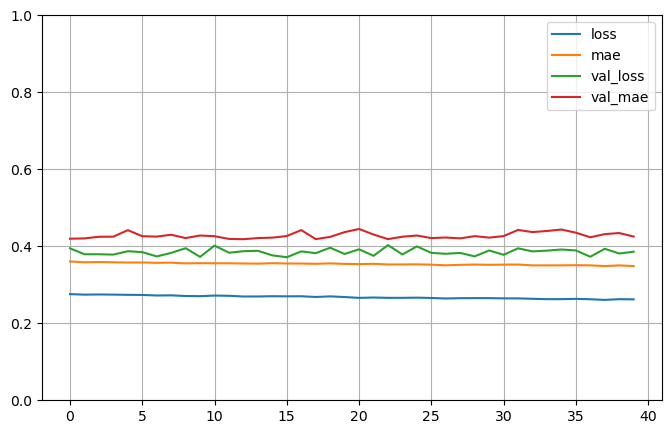

In [36]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Epochs value 40 is good for my model as my graph started converging

In [37]:
x_new = x_test[:10]

In [38]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:10])

1/1 [==============================] - 0s 112ms/step
[[0.48707032]
 [1.3270766 ]
 [5.386935  ]
 [2.6078906 ]
 [3.2635455 ]
 [1.7254734 ]
 [2.3491712 ]
 [1.6245321 ]
 [3.0646615 ]
 [4.413137  ]]
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]
